**3) Axis grids**
When were are a multi-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of our data set.

__Grid charts/plots__ (also called panels, lattices, or trellis charts/plots) allow for this in a series of similar graphs using the same scales and axes. This allows easy comparisons and provides a brief overview of the data under analyses.

Lets try this with seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**3.1) FacetGrid()**
FacetGrid provides a general way to draw grids of plots.
Can be draw with up to 3-dimensions with row, col and hue. Think of the hue as a 3rd dimension along the depth axis, with different colors at different depths

The number of unique values in the dataset determines how many rows/colors/hues the grid will have. The values of these should be categorical or discrete.

In [6]:
# lets count to make sure
tips['day'].nunique(), tips['time'].nunique(), tips['smoker'].nunique()

(4, 2, 2)

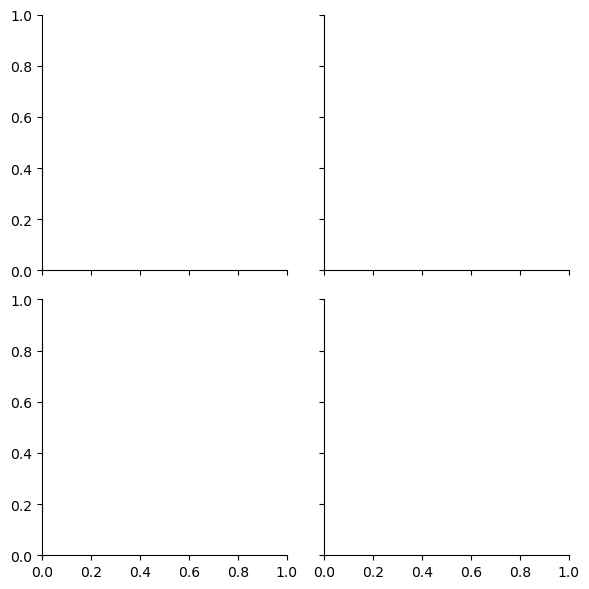

In [7]:
# since we have 2 unique times and 2 unique smokers, we expect a 2 x 2 grid
g = sns.FacetGrid(data=tips, col='time', row='smoker')

C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteri

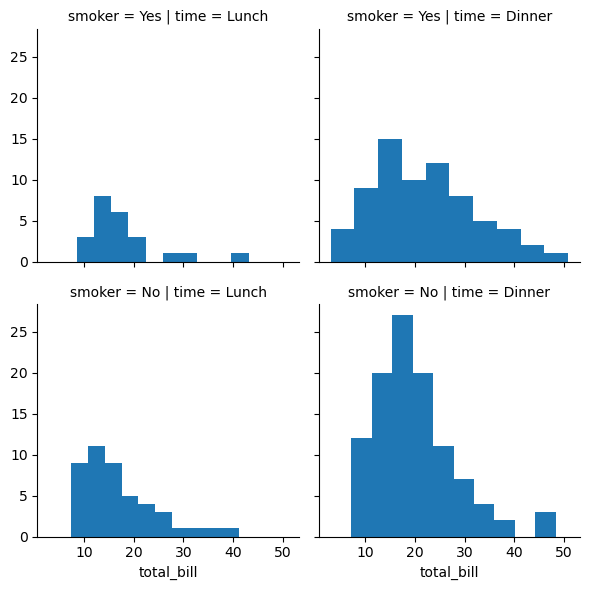

In [8]:
# now use the map() method to visualize the data
# Lets look at distribution of 'total_bill' in each subset
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g = g.map(plt.hist, 'total_bill')

C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteri

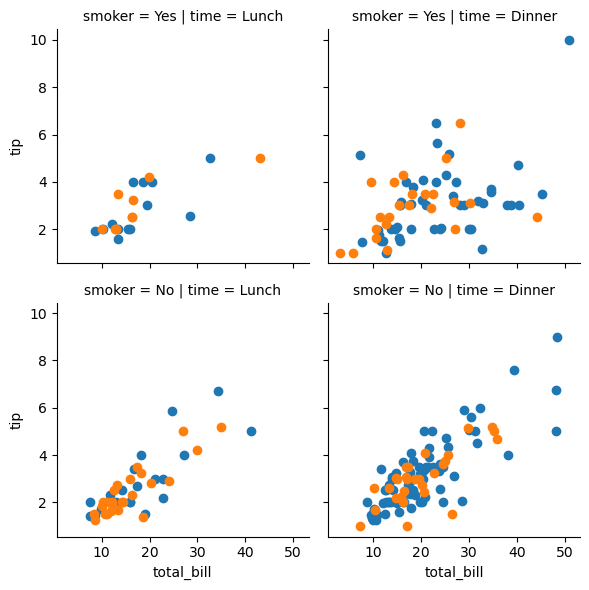

In [11]:
# lets try to map a different kind of plot, a scatter plot
g = sns.FacetGrid(data=tips, col='time', row='smoker', hue='sex')
g = g.map(plt.scatter, 'total_bill', 'tip')

**3.2) PairGrid()**
PairGrid is a subplot grid for plotting pairwise relationships in a dataset.
Its similar to a `jointplot`

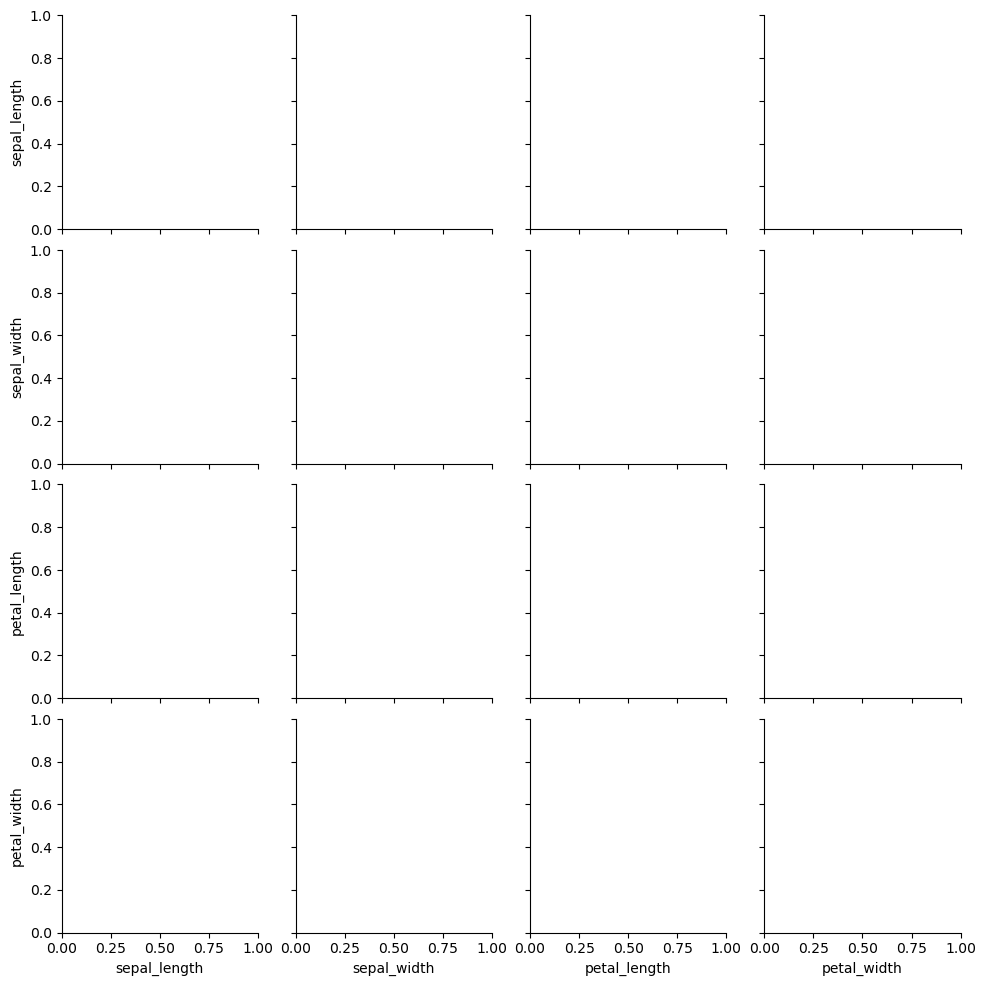

In [12]:
g = sns.PairGrid(iris)

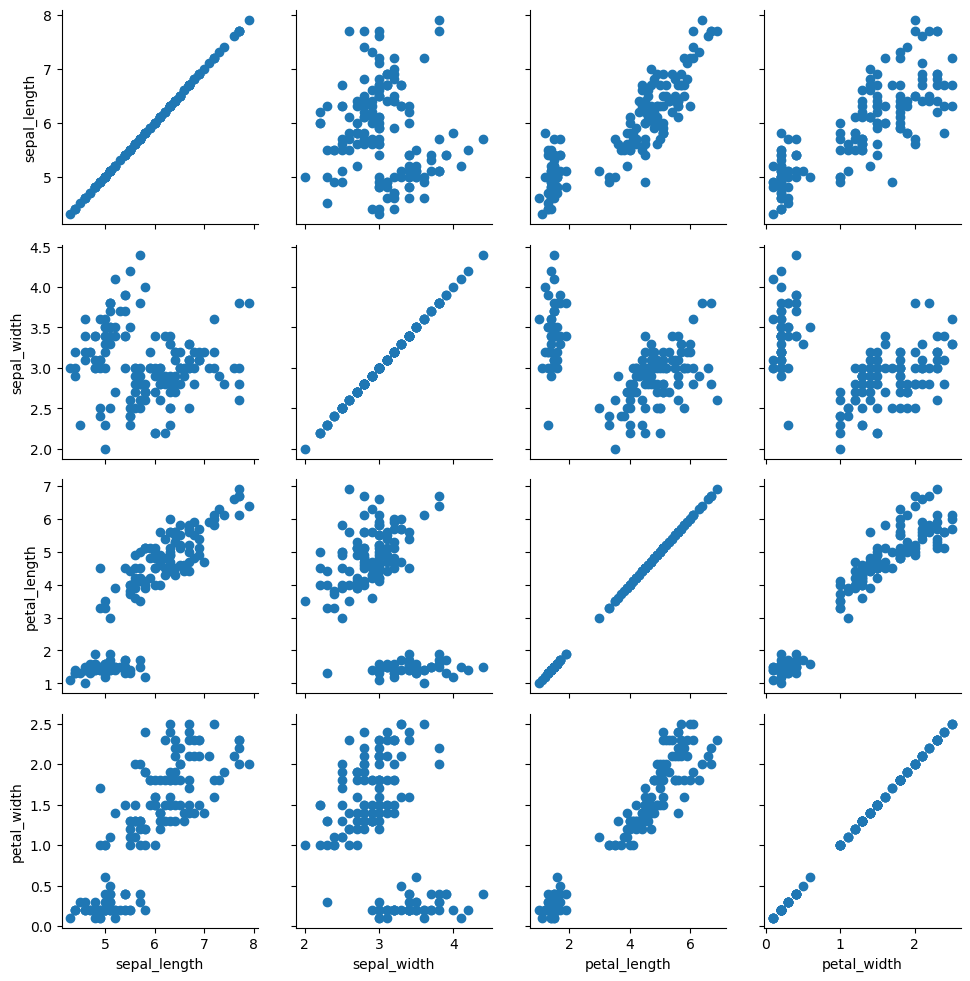

In [18]:
g = sns.PairGrid(iris)
g = g.map(plt.scatter)

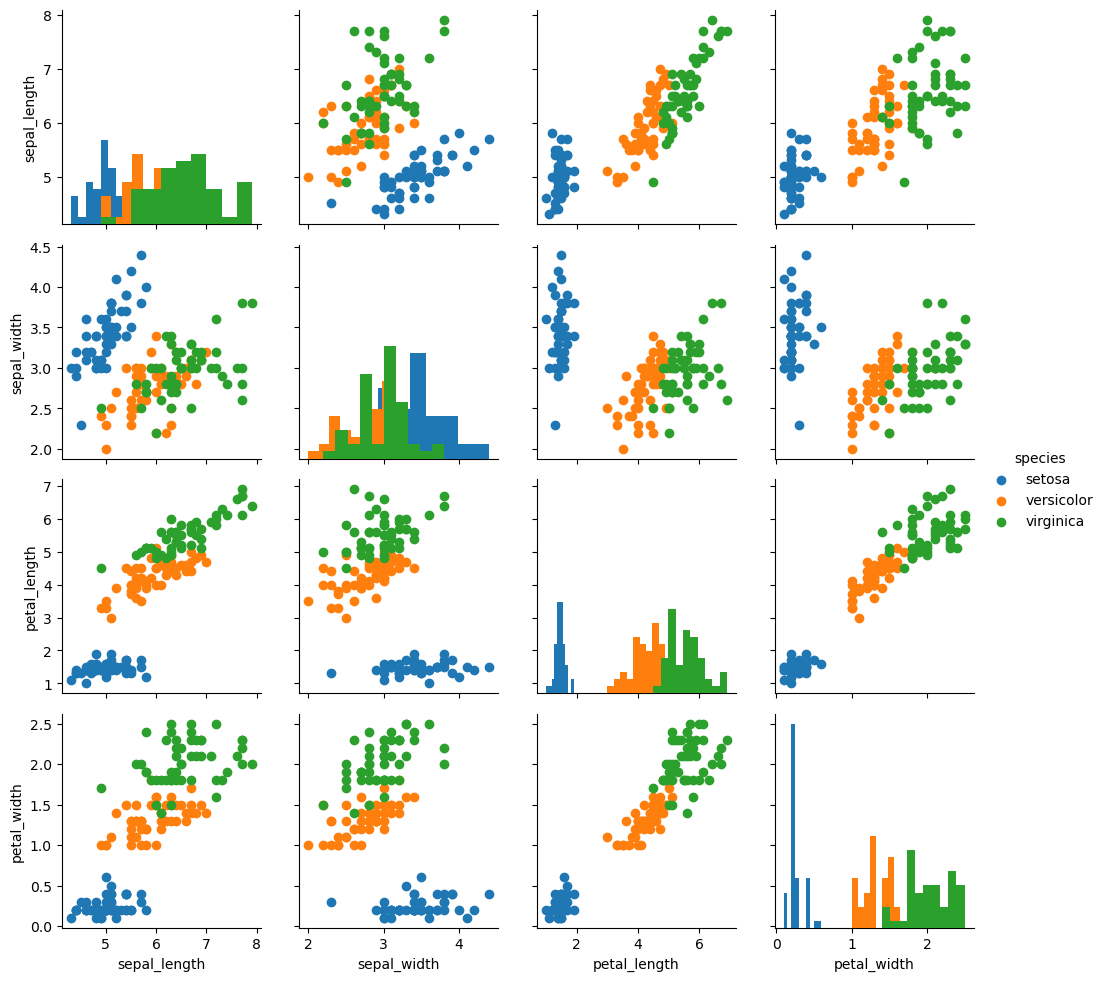

In [19]:
# we can actually control our plots
g = sns.PairGrid(iris, hue='species')
# we want hist plot along the diagonal
g.map_diag(plt.hist)
# we want scatter plot off diagonal
g.map_offdiag(plt.scatter)
# we can add legend as well
g.add_legend()

C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

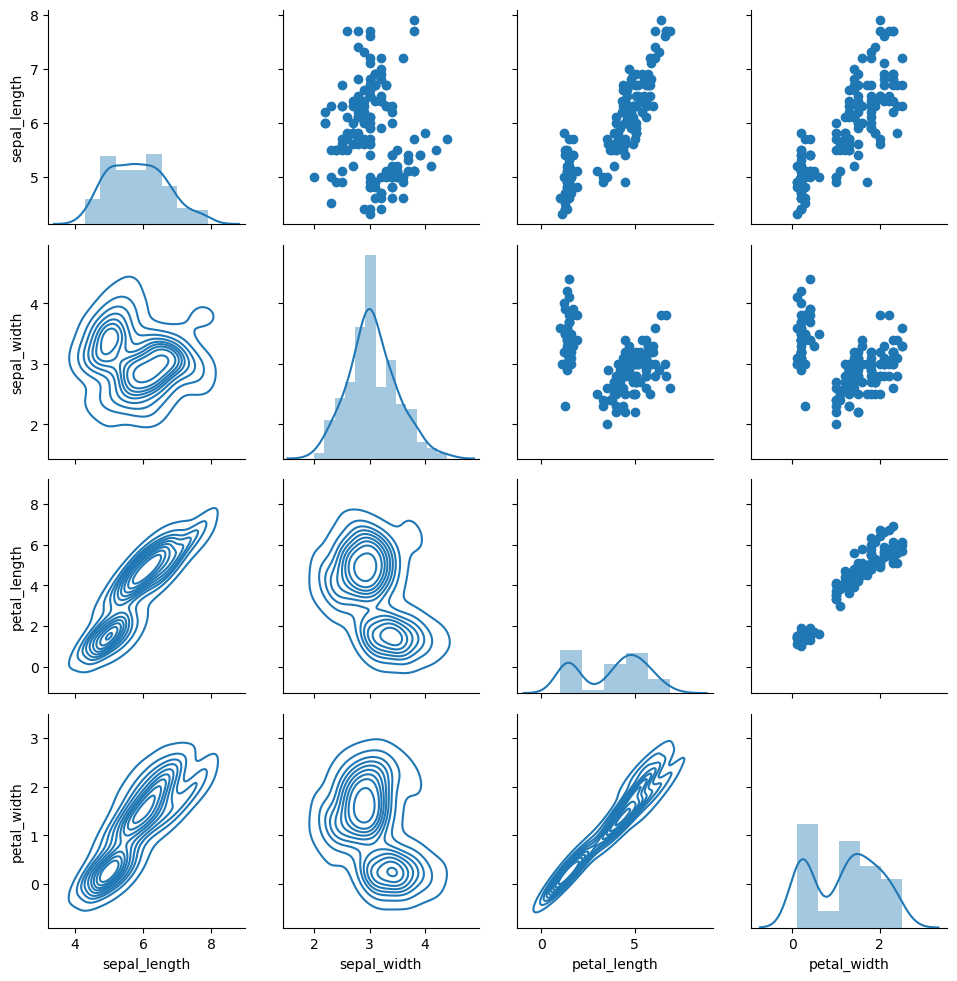

In [20]:
# its also possible to use different functions in the upper
# and lower triangles (i.e. relative to the diagonal)
g = sns.PairGrid(iris)
# we want dist plot along the diagonal
g.map_diag(sns.distplot)
# we want scatter plot on upper
g.map_upper(plt.scatter)
# we want kdeplot on lower
g.map_lower(sns.kdeplot)

**3.3) pairplot()**
pairplot is a simpler version of PairGrid. Lets call how it works

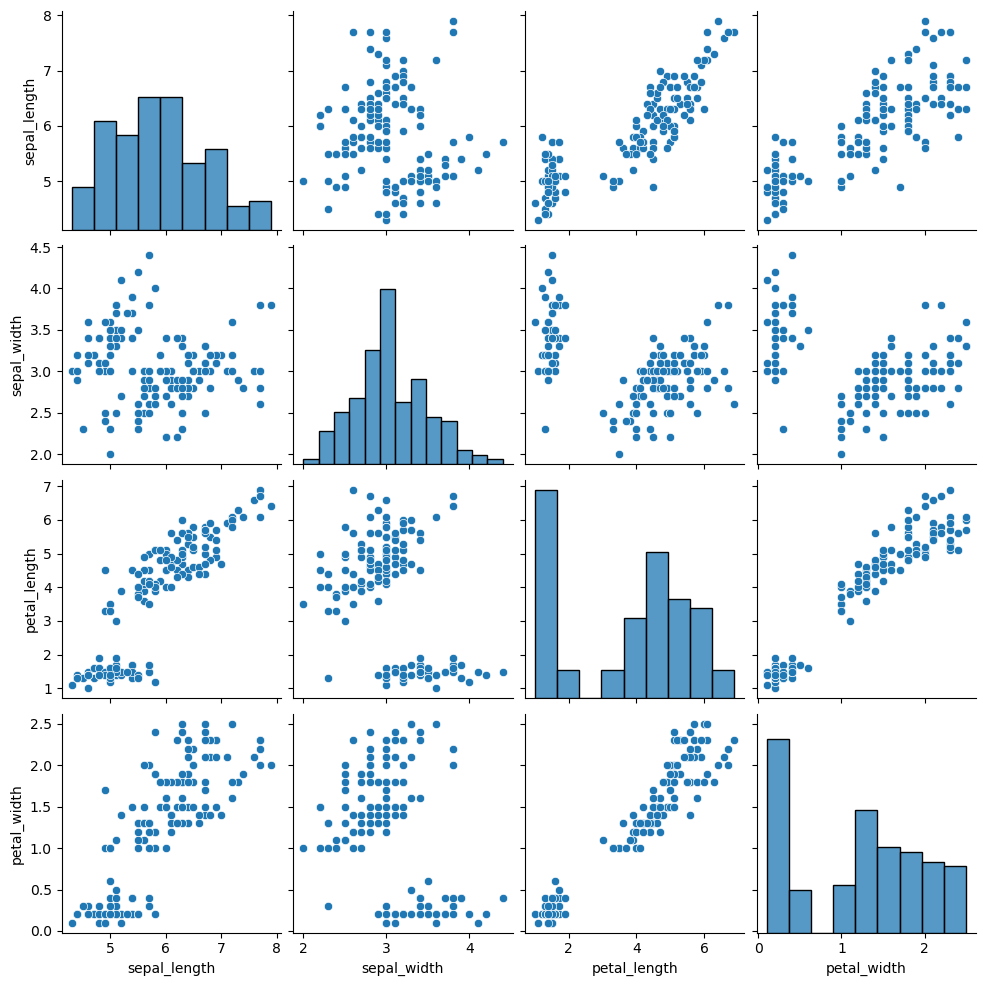

In [21]:
sns.pairplot(iris)

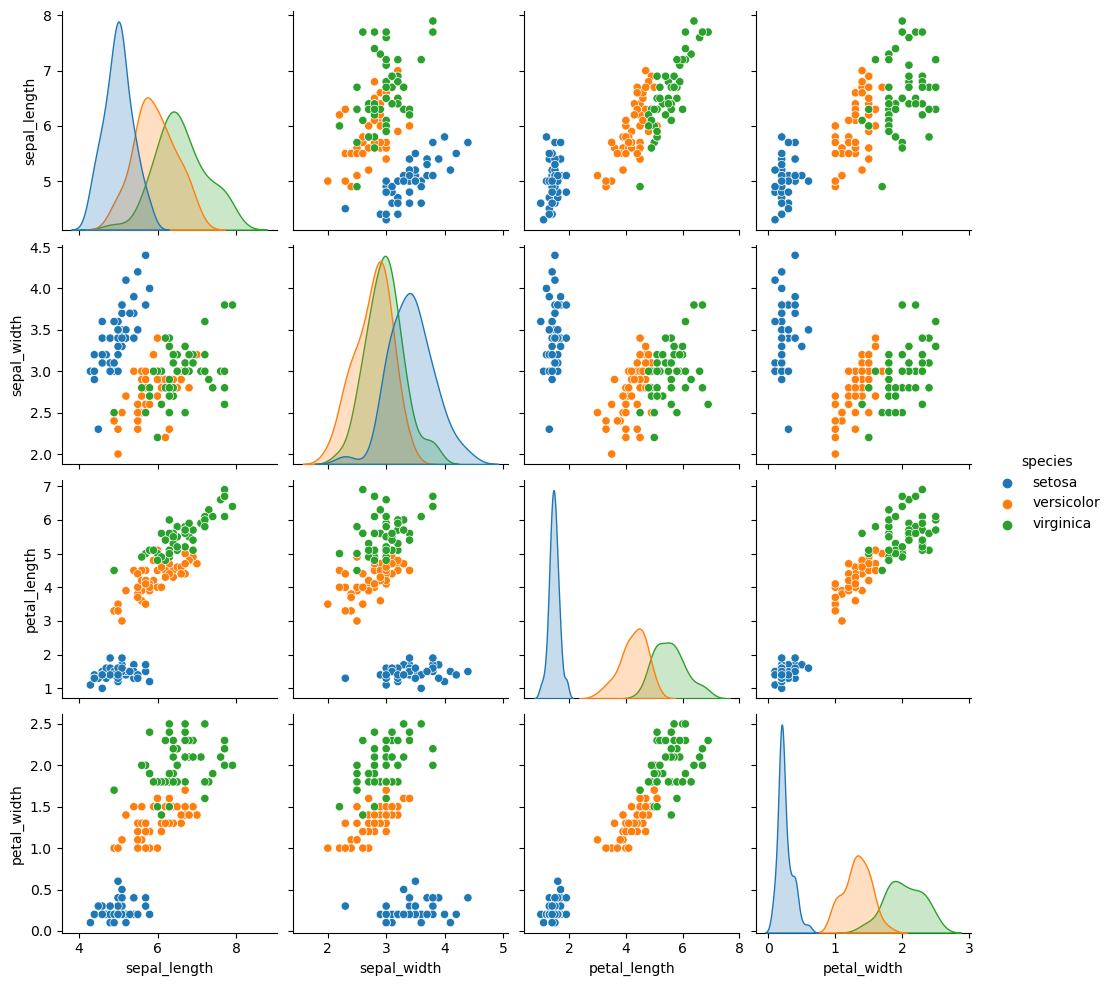

In [22]:
sns.pairplot(iris, hue='species')

**3.4) JointGrid**
JointGrid is a general version for jointplot() type grids

C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asuchar\AppData\Local\miniconda3\envs\dss-part1\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y

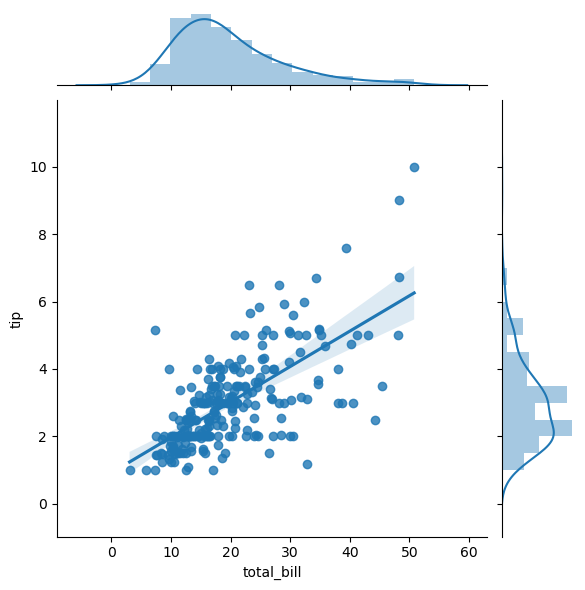

In [24]:
g = sns.JointGrid(x='total_bill', y='tip', data=tips) # instantiating the grid first
g = g.plot(sns.regplot, sns.distplot) # Data on the grid!
